# Part 1

## Python Coding and Data Set

### Importing all the required libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from matplotlib import pyplot as plt
from itertools import chain

### Load in the data file and header file provided 

In [ ]:
# Read the header file 
hd= pd.read_csv (r'C:/Users/Lina/Desktop/GA/field_names.txt' ,header=None)

# Read the actual data and appending the header data to the dataframe
df = pd.read_csv (r'C:/Users/Lina/Desktop/GA/breast-cancer.csv', header=None, names=hd[0].tolist())


### Compute the mean and median smoothness and compactness for benign and malignant tumors 

In [ ]:
# 1- split the data based on whether it is benign or malignant 
groups=df.groupby('diagnosis')
benData=groups.get_group('B')  # benign data
malData=groups.get_group('M')  # malignant data

 
# 2- the computation of the mean and and median 
print(benData['smoothness_mean'].describe())
print(malData['smoothness_mean'].describe())
print(benData['compactness_mean'].describe())
print(malData['compactness_mean'].describe())
print('************************************************')

Results:
Discriptive statistics for smoothness_mean of benign data 
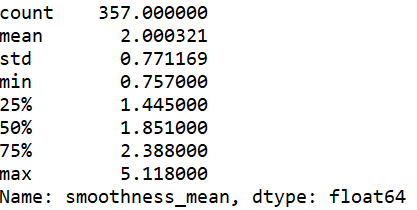

Discriptive statistics for smoothness_mean of malignant data 
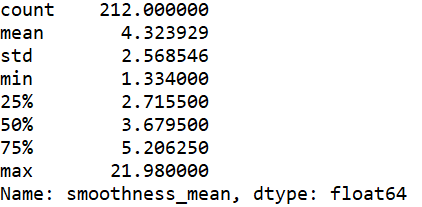

Discriptive statistics for compactness_mean_mean of benign data 
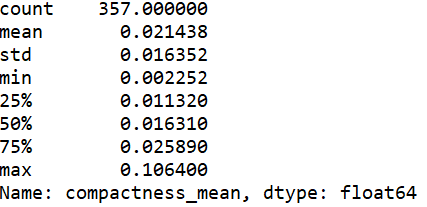

Discriptive statistics for compactness_mean_mean of malignant data 
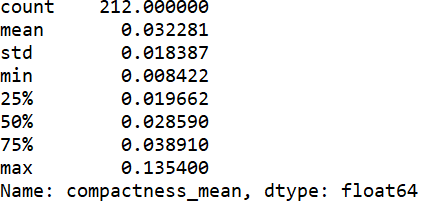

We identify the mean and the median by using the information corresponding to 'mean' and '50%' respectively. From the result, we can tell that there are differences in the mean and median smoothness and compactness for benign and malignant tumors. This indicates smoothness and compactness are good features for differentiating the benign from malignant cancer.


### Write a function to generate bootstrap samples of the data

In [ ]:
# N is the number of samples to generate 
# K number of rows per sample 
def generate_bootstrap_samples(N , K):
    for j in range(1,N+1):
        i=np.random.choice(len(df), K) # i represtns the indices of the randomly selected rows
        sub_df= df.iloc[i] # sub_df represnts the sample 
        print('Sample' , j)
        print(sub_df)
    
# Generate bootstrap samples function call of 3 samples and 5 rows each
generate_bootstrap_samples(3 , 5) 

Results:
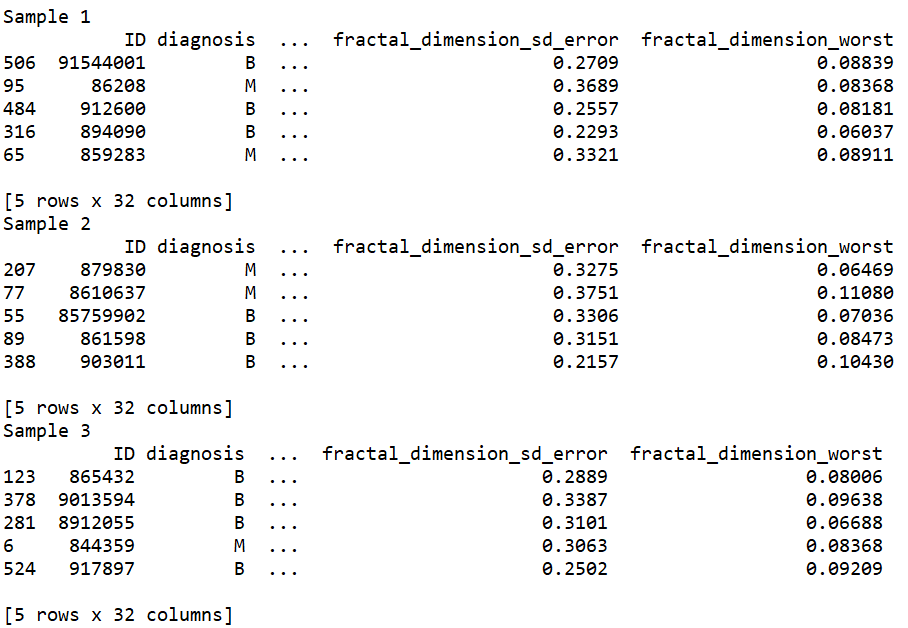

## Exploratory Analysis

### Identify 2-3 variables that are predictive of a malignant tumor

In [ ]:
# droping ID column because it does not affect the analysis 
df = df.drop('ID', 1) 
print('************************************************')
features = hd[0].tolist()

# Separating out the features
x = df.loc[:, features[2:32]].values

# Separating out the target (diagnosis)
y = df.loc[:,['diagnosis']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


finalDf = pd.concat([principalDf, df[['diagnosis']]], axis = 1)

## Visualization 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['M', 'B']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['diagnosis'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Identify 2-3 variables that are predictive of a malignant tumor using PCA
print(abs(pca.components_ ))


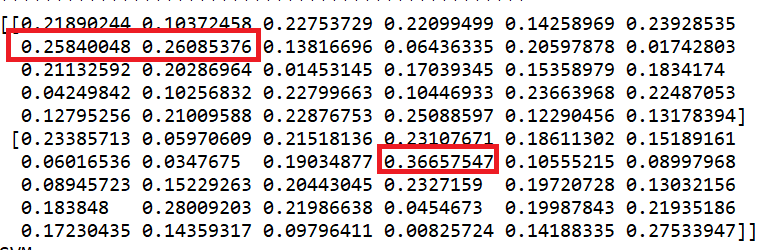

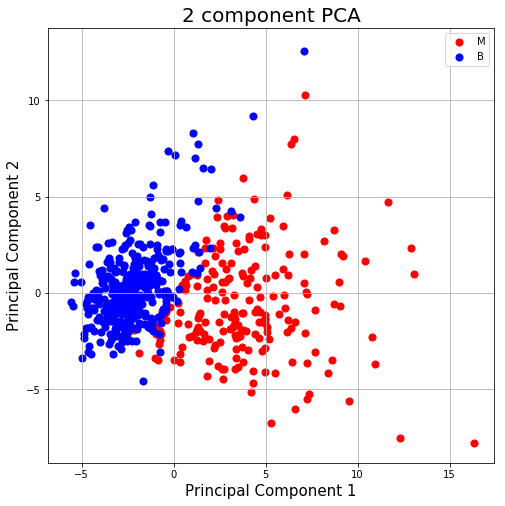

Principle Component Analysis (PCA) was used to identify the variables. It is useful for features extraction. By printing the results of the PCA, I selected the top 3 values from the first two components and then mapped them to the names of the variables. The higher value represents a higher variance. The top 3 variables for predicting the tumor are perimeter_mean and perimeter_sd_error from the first component and area_mean from the second component. (Figure PCA.png). The graph shows that the classes were well separated from each other.(Figure PCA_Classes) 

## Modeling

### Build a model to predict the malignant tumors

#### Use at least two classification techniques; compare and contrast the advantages and disadvantages of each

I used two claissfication techniques: SVM (Support Vector Machine) and KNN (K-nearest neighbor)

In [ ]:
#  divide data into training and test sets. x is the features and y is the target from the Exploratory Analysis section
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)  


SVM Classification

In [ ]:
# 1- train the algorithm
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)

# 2- Making Predictions
y_pred = svclassifier.predict(X_test) 

# 3- Evaluating the Algorithm
print ('SVM')
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test, y_pred))

KNN Classification

In [ ]:
# 1- Training and Predictions
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test) 

# 2- Evaluating the Algorithm
print ('KNN')
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

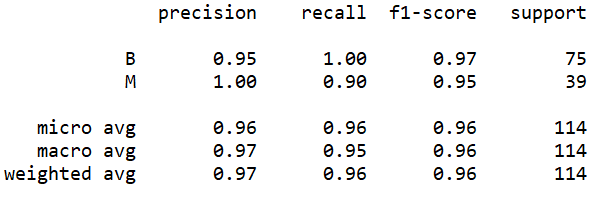
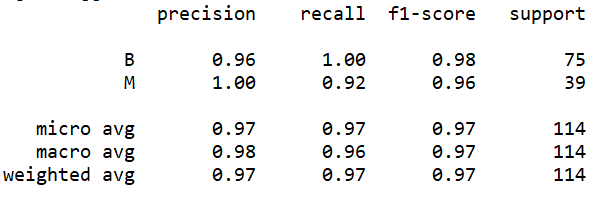
The above two figures show the performance of SVM and KNN respectively. In term of performance, looking at F1 score, we may notice that KNN performed better than SVM. KNN classified correctly 98% of benign class and 96%  of malignant class while SVM classified correctly 97% of benign class and 95%  of malignant class.

KNN is a simple algorithm and it does not require making any assumption regarding the data distribution which makes it a non-parametric technique. In real-world problems, the distribution of the data is not known. Therefore, the KNN algorithm is applicable. KNN has no training phase which leads to reduce the steps that required for prediction. However, KNN is expensive in term of computation. Also, it requires using all the training data in the testing phase.  The choice of K is tricky and if it is big then the prediction will be slower. In addition, if K is even, there might be some cases where the tie issue would occur.  Moreover,  KNN is sensitive to irrelevant feature

SVM is really effective in a higher dimension. It outperforms other classification techniques when classes are separable
In addition, outliers have less impact. However, for a large dataset,  it requires a large amount of time to process. Also, SVM requires selecting kernel function (data tranformstion function) which can be tricky.

To summarize the above, KNN does not require training phase but SVM does. KNN is challenging in term of choosing K and this is not the case with SVM. SVM is tricky in term of selecting the kernel function and this is not the case with KNN. 

#### Identify how you would control for overfitting in each classification technique

In KNN the overfitting is caused by the number of data points. If the number of the data point is large and the choice of K is small then the overfitting could occur easily regardless of the existence of the noise.  Therefore, to avoid the overfitting, it is important to increase the K value that leads to an increase in the number of neighbors so that we can use a region big enough for the classification decision.

SVM overfitting is affected by the kernel function. If the width of the function is small then the overfitting might occur. Another factor is the size of the parameter that balances the trade-off between the model complexity and error. If the parameter is large then it might lead to overfitting. Therefore, to control the overfitting in SVM, we need to increase the width of the kernel function and decrease the size of the balancing parameters.

#### Evaluate the performance of each model

The above two figures show the performance of SVM and KNN respectively. In term of performance, looking at F1 score, we may notice that KNN performed better than SVM. KNN classified correctly 98% of benign class and 96%  of malignant class while SVM classified correctly 97% of benign class and 95%  of malignant class.

#### In each model, identify the most important predictive variables and explain how you identified them 

In [ ]:
## importance of variables in SVM 
plt.close()
yVal=list(chain.from_iterable(abs(svclassifier.coef_)))
plt.plot(yVal, 'o')
plt.xticks(range(30), features[2:32] , rotation=90)
plt.ylim(0, 1)

KNN does not provide a prediction for the importance or coefficients of variables. Therefore, we have to use other technique to find the most important variables like logistic regression. For SVM, we mau use "svm.coef_"  because we are using linear kernel function. The result showed that the top 3 important variables are: concavity_to_error , concave_points_mean and perimeter_mean. 

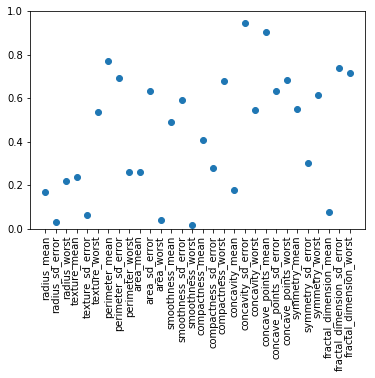

## Explanation

### Technical Audiences 

In this cancer classification problem, I applied 2 classification techniques: Support Vector Machine and k-nearest neighbors. Due to the fact of having a simple dataset, both techniques achieved great performance, above 90%. However, having such a good performance does not mean that they will predict the same with a different dataset. With more complex dataset we might need to try different techniques such as random forest, logistic regression, and decision tree. 

For the KNN technique, it has the challenge of selecting the most suitable K. Thus, it requires trying different K values and compare their performance and select the best score and then choose the corresponding K accordingly for the final prediction. Other important consideration when choosing K, is avoiding even numbers because having even number might require dealing with breaking tie problem. Tie problem occurs when we have the same number of votes for the data point to predict. 

For the SVM technique, it is useful when dealing with high dimension but it has the challenge of selecting the kernel function for data transformation. Therefore, it is suggested to try SVM with different kernel functions and then compare the performance accordingly. Also, SVM has a challenge when splitting the data into training and testing if we have a small number of data. We can address this problem by cross-validation. Overfitting problem might occur due to the kernel function width. Therefore, it has to be put into consideration to avoid it.
 

### Non-Technical Audiences

In this cancer classification problem, I applied 2 classification techniques: Support Vector Machine and k-nearest neighbors. Due to the fact of having a simple dataset, both techniques achieved great performance, above 90%. There are many features that are important on identifying tumor being malignant or benign, such as concavity_to_error , concave_points_mean and perimeter_mean.

# Part 2

## student-sample-1.py

1.	Code:

My comments 
-	Importing numpy library but not using it. (line 4)
-	Using unknown variable ‘data’ instead of ‘d’ in data setup step (lines 13 and 14)
-	Placing the import libraries within the code instead of placing them on the top (lines 20 and 21)
-	Importing unused libraries (lines 20 and 21)
-	Unacceptable import from sklearn (line 5)
-	Unacceptable import from sklearn (line 6)

My suggestion:
-	Remove import numpy library.
-	Be accurate in term of using the variables. I would suggest replacing ‘d‘with ‘data’. 
-	The import lines better to be placed on the top.
-	Remove unnecessary import.
-	Import LinearRegression from sklearn.linear_model.
-	Import cross_val_score from sklearn.model_selection.


2.	Methodology:

My comment 
-	The fitting and prediction steps are missing
-	Unacceptable value for one of the parameter (scoring). (line 22)

My suggestion
-	Consider adding the fitting and prediction steps.
-	Ensure using the possible acceptable value for the parameter. (line 22)


3.	Conceptual Understanding:

I would suggest the following in term of writing the codes:
-	Avoid using undefined variables. 
-	Avoid importing unnecessary libraries. 
-	Place the import lines at the top of the code. 

I would suggest the following in term of conceptual understanding:
-	Ensure understanding the process of any prediction or classification problem. 
-	Ensure following the steps in the correct order.


## student-sample-2.py

1.	Code:

My comments 
-	Importing numpy library but not using it. (line 4)
-   Unacceptable import from sklearn (line 6)

My suggestion:
-	Remove import numpy library.
-	Import cross_val_score from sklearn.model_selection.


2.	Methodology:

My comment 
-	The fitting and prediction steps are missing
-	Unacceptable value for one of the parameter (scoring). (line 21)

My suggestion
-	Consider adding the fitting and prediction steps.
-	Ensure using the possible acceptable value for the parameter. (line 21)


3.	Conceptual Understanding:

I would suggest the following in term of writing the codes:
-	Avoid importing unnecessary libraries. 

I would suggest the following in term of conceptual understanding:
-	Ensure understanding the process of any prediction or classification problem. 
-	Ensure following the steps in the right order.


End of DSI Instructor Challenge